In [1]:
# ✅ 한글 폰트 설치 (NanumGothic)
!apt-get update -qq
!apt-get install -y fonts-nanum

# ✅ matplotlib 폰트 캐시 삭제
import os
os.system('rm -rf ~/.cache/matplotlib')

print("✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M+.) 을 꼭 해주세요.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 51 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (61.3 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M+

In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os


# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation
# Convolutional Layer
# 합성곱을 수행하는 레이어
# Convolutionla Layer 를 사용하는 신경망을 CNN이라고 부른다.
# 커널에 설정되어 있는 가중치 값에 따라서 특정 부분의 값을 낮추고 특정 부분의 값을 키워서
# 특성이 잘 드러나게 하는 역할을 수행한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling
# Convolutional Layer를 통과한 데이터에서 큰 부분만 취하는 역할을 수행한다.
# 필요한 특성을 나타내는 부분을 취하고 나머지는 버리는 효과를 얻게 된다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# 다차원의 데이터를 1차원 데이터로 변환시켜준다.
# 선형회귀 레이어로 가기전에 두어야 한다.
from tensorflow.keras.layers import Flatten
# Dropout : 데이터 하나가 들어오면 레이어의 모든 노드가 그 데이터를 학습하게 된다.
# 그렇기 때문에 모든 가중치 값이 데이터에 영향을 받아서 변경된다.
# 만약 각 노드들이 특정 패턴의 데이터만 학습하고자 한다면 학습시 일부 노드들을 비활성화 시켜서
# 학습에 참여시키지 않게 할 수 있다.
# 전체 데이터에 대해 모든 노드들이 과접합을 되는 것을 예방한다.
from tensorflow.keras.layers import Dropout
# Embedding : 주어진 단어 데이터를 통해 단어 벡터를 생성하는 레이어
# 생성한 벡터 공간의 차원을 매개변수로 받는다.
# 주어진 문장 데이터의 단어 개수가 공간의 차원을 넘어서면 출현 빈도수가 높은 단어들로만
# 구성하여 공간 벡터를 구성한다.
from tensorflow.keras.layers import Embedding
# LSTM : RNN 용 Layer
# 이전에 입력된 데이터와 함께 묶어서 학습할 데이터를 생성하는 방식으로 동작하는 레이어
# 순환신경망. 문장 데이터, 주식시세, 시계열 데이터 등의 데이터 패턴을 보고 다음 데이터를
# 예측하는데 사용한다.
# LSTM은 Long Term Memory와 Short Term Memory를 두어 데이터의 패턴이 좀더 다양하게 생성될 수
# 있도록 하는 특징을 가지고 있다.
from tensorflow.keras.layers import LSTM

# GAN
# GAN에서 사용하는 활성화 함수
from tensorflow.keras.layers import LeakyReLU
# 레이어를 통과한 데이터를 다시 표준화하여 학습 효율성을 높히게 한다.
from tensorflow.keras.layers import BatchNormalization
# 레이어를 통과한 데이터의 차원을 변경하기위 사용한다.
from tensorflow.keras.layers import Reshape
# 데이터 업샘플링 - Convolutional Layer가 데이터의 크기를 줄이므로 늘리는 것이 필요하다
from tensorflow.keras.layers import UpSampling2D
# 입력층
from tensorflow.keras.layers import Input
# 딥러닝 모델, GAN은 생성자 신경망과 판별자 신경망을 같이 써야 하기 때문에
# 이 둘을 하나의 신경망으로 합치기 위해 사용한다.
from tensorflow.keras.models import Model


# 다중 분류를 위한 원핫 인코딩
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델 복원
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기 중단
from tensorflow.keras.callbacks import EarlyStopping

# 경사하강법
from tensorflow.keras.optimizers import Adam

# 문자열을 잘라낸다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터 수를 동일하게 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 단어 사전으로 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전이 학습을 위한 사전 학습 모델
from tensorflow.keras.applications import VGG16

# 이미지 데이터를 불러올 때 나눠서 읽어오거나 읽어올때 이미지 데이터를 가공하면서
# 가져울 수 있는 도구
# 이미지가 들어있는 폴더이름이 결과데이터가 됨(그렇기때문에 폴더를 잘 구성해주어야 함)
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.applications import ResNet152

# 출력한 것을 청소하는 함수
from IPython.display import clear_output
# 시간 관련
import time

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [51]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/찐최종데이터/final_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/찐최종데이터/final_test.csv')

all_df = pd.concat([train_df, test_df])
all_df.reset_index(inplace=True, drop=True)


total_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/최종데이터/청구잔액_최종데이터.csv')
total_df

,ID,Segment,월중평잔_일시불_B0M,평잔_6M,평잔_CA_6M,잔액_리볼빙일시불이월_B0M,RV_최대잔액_R3M,평잔_일시불_해외_6M,월중평잔_일시불,RV_평균잔액_R3M,...,상환개월수_결제일_R6M,포인트_이용포인트_R3M,상환개월수_결제일_R3M,연체건수_R3M,마일_적립포인트_R12M,혜택수혜금액_R3M,선결제건수_R3M,할인금액_R3M,마일_잔여포인트_B0M,포인트_포인트_월적립_R3M
0,TRAIN_000000,D,1084,15988,17008,0,0,0,1503,0,...,5,1296,3,0,0,3,0,0,0,0
1,TRAIN_000001,E,4090,7045,0,0,0,0,4447,0,...,6,0,3,0,0,0,0,0,0,0
2,TRAIN_000002,C,5006,66549,43351,6795,5134,0,5540,2848,...,6,2765,3,0,0,121,0,0,0,0
3,TRAIN_000003,D,487,30139,30697,0,0,0,606,0,...,5,2467,3,0,0,3,0,0,0,0
4,TRAIN_000004,E,0,28,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,TEST_99995,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2999996,TEST_99996,NaN,260,275,0,0,0,0,256,0,...,5,0,3,0,0,149,2,150,0,0
2999997,TEST_99997,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2999998,TEST_99998,NaN,16911,20549,0,0,0,240,14005,0,...,1,3804,1,0,0,0,3,0,0,0


In [53]:
all_selected_features = total_df.columns.tolist()
all_selected_features

['ID',
 'Segment',
 '월중평잔_일시불_B0M',
 '평잔_6M',
 '평잔_CA_6M',
 '잔액_리볼빙일시불이월_B0M',
 'RV_최대잔액_R3M',
 '평잔_일시불_해외_6M',
 '월중평잔_일시불',
 'RV_평균잔액_R3M',
 '평잔_할부_6M',
 '평잔_일시불_6M',
 '평잔_3M',
 '잔액_현금서비스_B0M',
 '잔액_할부_유이자_B0M',
 '잔액_일시불_B0M',
 '잔액_할부_B0M',
 '잔액_현금서비스_B2M',
 'RV_평균잔액_R12M',
 '연체일수_최근',
 '잔액_할부_무이자_B0M',
 '청구금액_R6M',
 '할인건수_R3M',
 '포인트_적립포인트_R12M',
 '선결제건수_R6M',
 '포인트_이용포인트_R12M',
 '포인트_포인트_건별_R3M',
 '청구금액_R3M',
 '할인금액_청구서_B0M',
 '포인트_적립포인트_R3M',
 '청구금액_B0',
 '혜택수혜금액',
 '할인금액_B0M',
 '할인금액_청구서_R3M',
 '연체건수_R6M',
 '마일_적립포인트_R3M',
 '할인건수_B0M',
 '포인트_마일리지_환산_B0M',
 '상환개월수_결제일_R6M',
 '포인트_이용포인트_R3M',
 '상환개월수_결제일_R3M',
 '연체건수_R3M',
 '마일_적립포인트_R12M',
 '혜택수혜금액_R3M',
 '선결제건수_R3M',
 '할인금액_R3M',
 '마일_잔여포인트_B0M',
 '포인트_포인트_월적립_R3M']

In [57]:
# 일치하는 컬럼
matched = [col for col in all_selected_features if col in all_df.columns]

# 누락된 컬럼
missing = [col for col in all_selected_features if col not in all_df.columns]

# 결과 출력
print(f"일치하는 컬럼 수: {len(matched)}")
print(f"누락된 컬럼 수: {len(missing)}")

# 일치하는 컬럼 목록 확인
print("\n일치하는 컬럼명:")
for col in matched:
    print("-", col)

total_df = total_df[matched]

일치하는 컬럼 수: 20
누락된 컬럼 수: 28

일치하는 컬럼명:
- ID
- Segment
- 청구금액_R6M
- 할인건수_R3M
- 포인트_적립포인트_R12M
- 선결제건수_R6M
- 포인트_이용포인트_R12M
- 포인트_포인트_건별_R3M
- 할인금액_청구서_B0M
- 청구금액_B0
- 할인금액_B0M
- 연체건수_R6M
- 할인건수_B0M
- 상환개월수_결제일_R3M
- 연체건수_R3M
- 마일_적립포인트_R12M
- 혜택수혜금액_R3M
- 선결제건수_R3M
- 마일_잔여포인트_B0M
- 포인트_포인트_월적립_R3M


### 세그먼트별 컬럼 비교(BoxPlot / KdePlot)

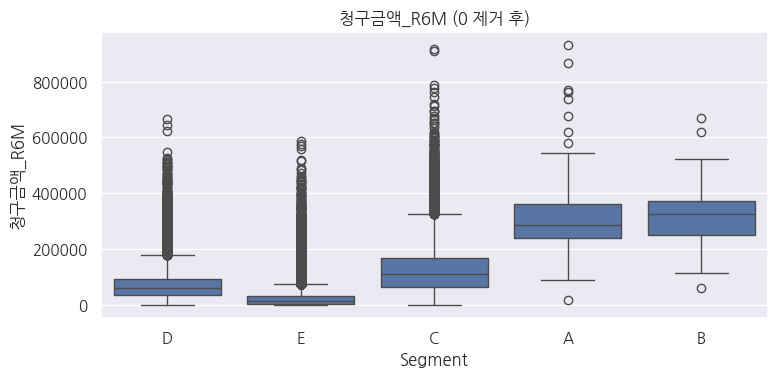

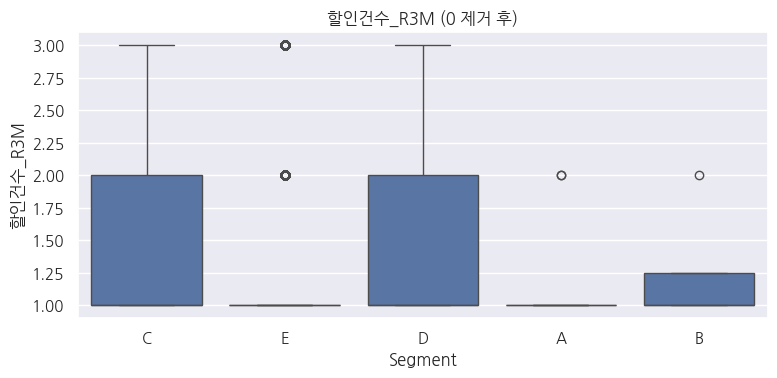

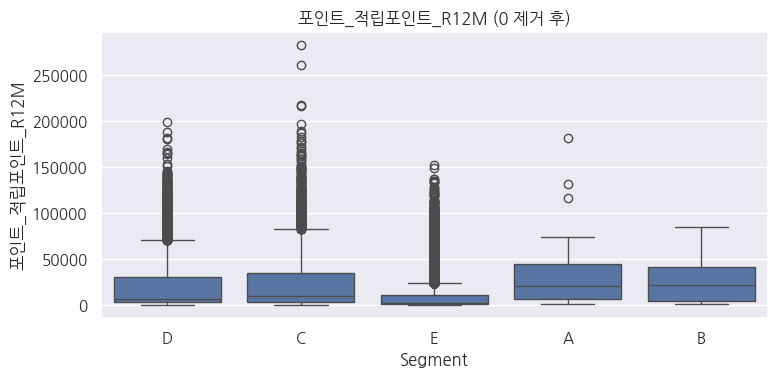

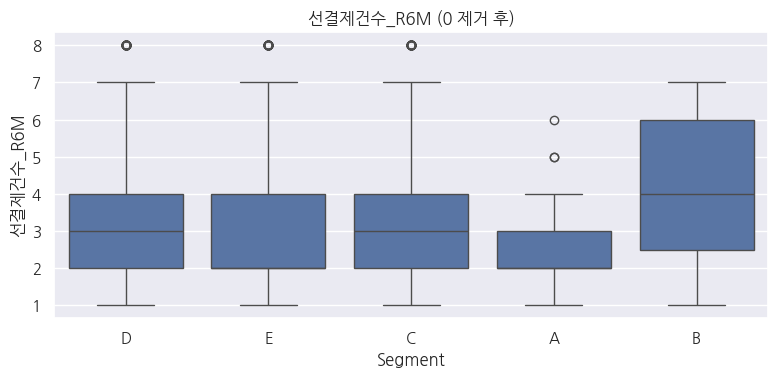

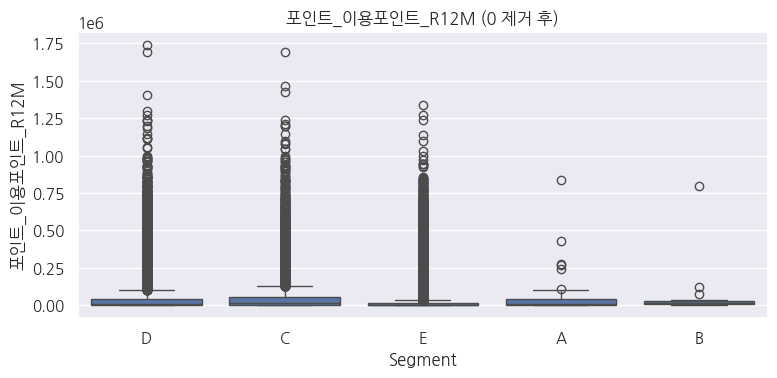

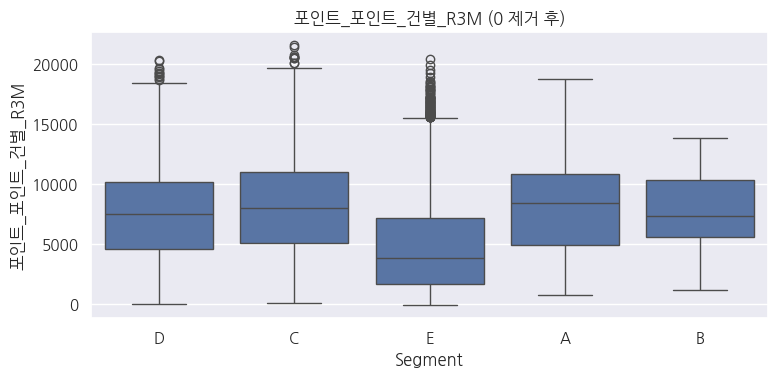

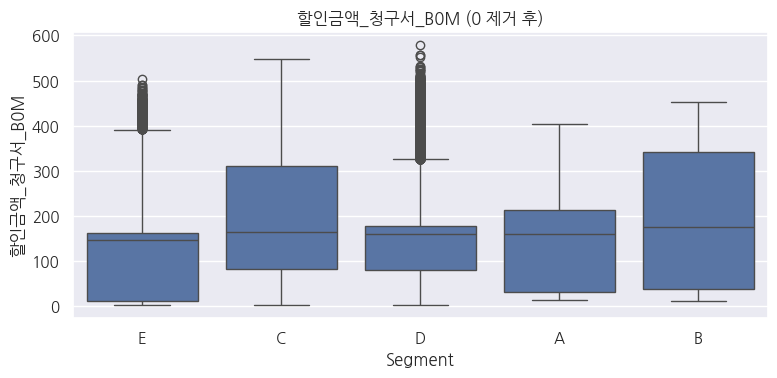

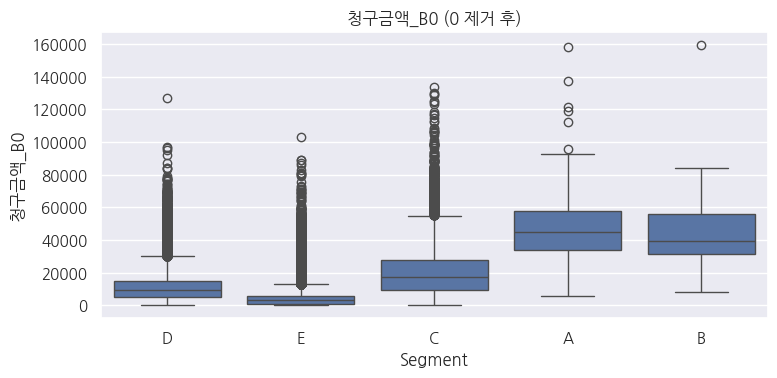

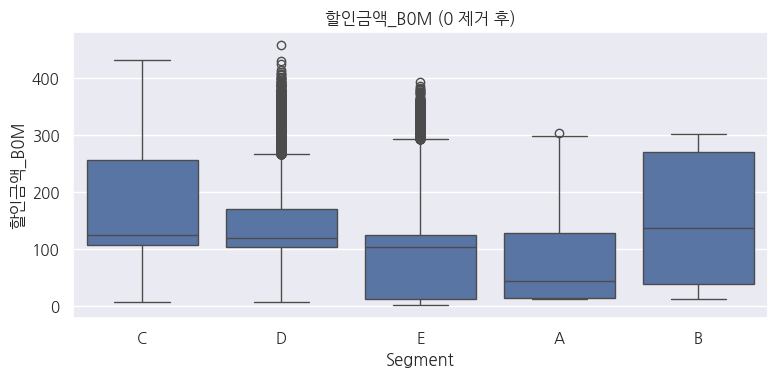

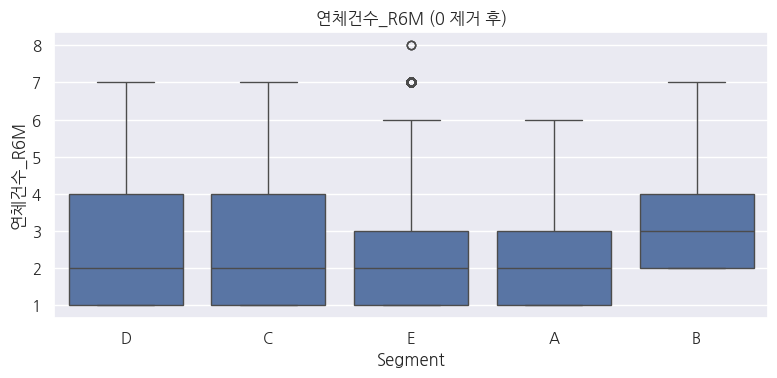

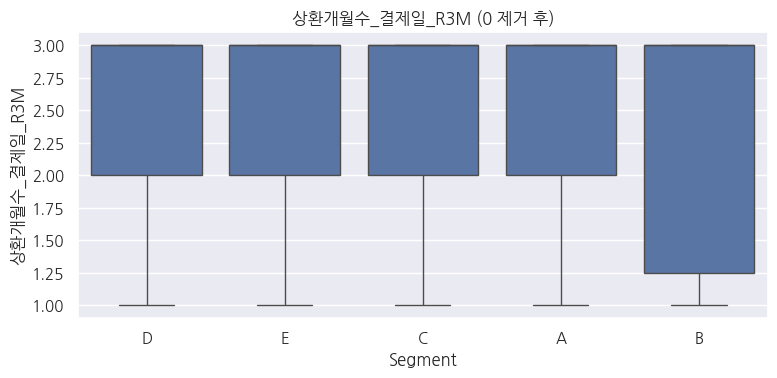

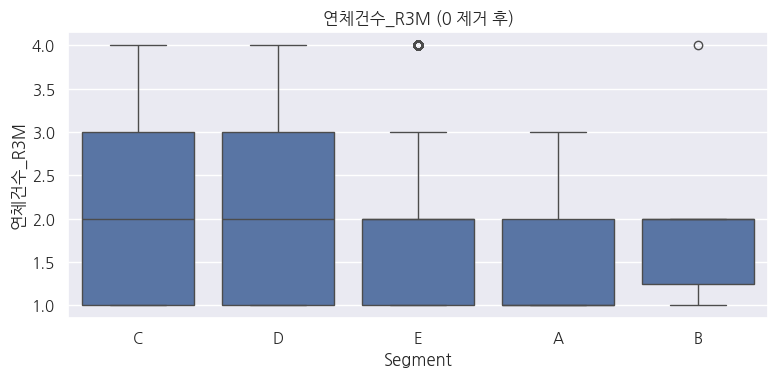

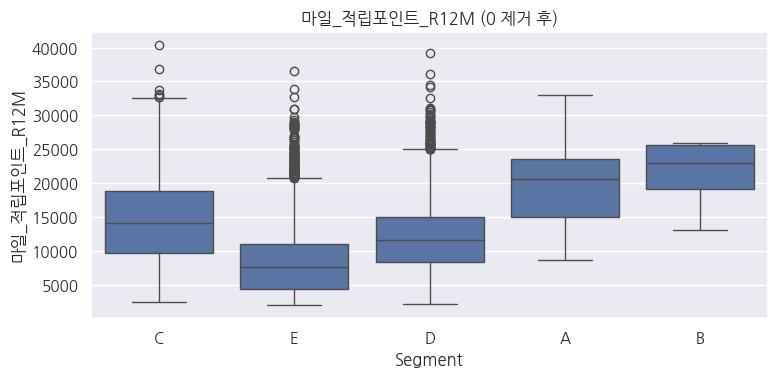

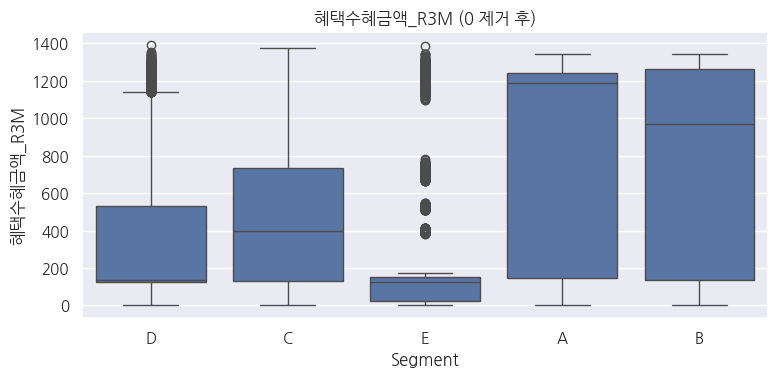

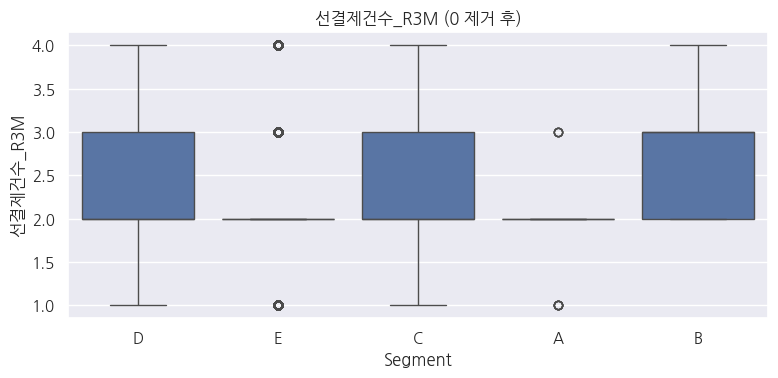

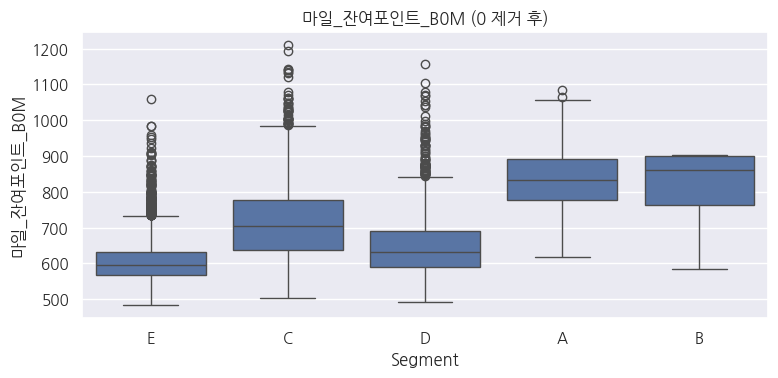

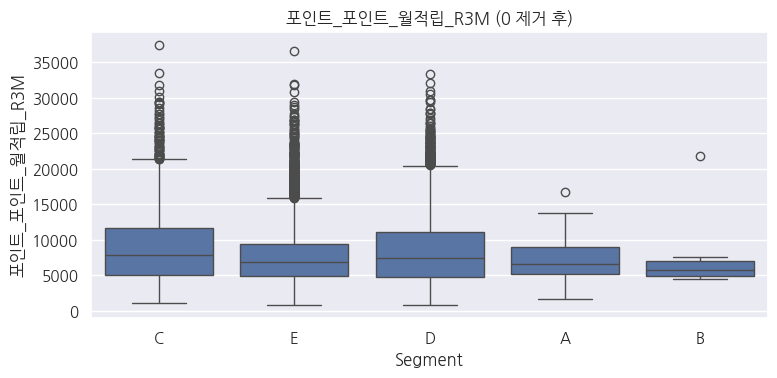

In [59]:
# 시각화할 컬럼 리스트
feature_cols = [col for col in total_df.columns if col not in ['ID', 'Segment']]
sample_cols = feature_cols[:]

# 각 변수별로 0 제외 후 boxplot
for col in sample_cols:
    filtered_df = all_df[all_df[col] != 0]  # 0인 값 제거
    if filtered_df[col].nunique() > 1:  # 값이 1개 이하일 경우 생략
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=filtered_df, x='Segment', y=col)
        plt.title(f'{col} (0 제거 후)')
        plt.tight_layout()
        plt.show()


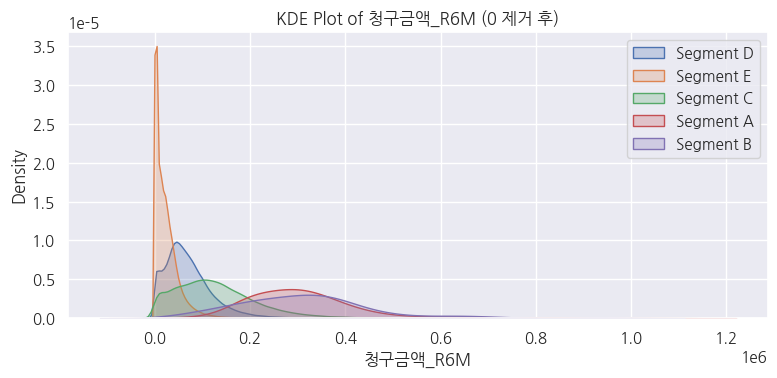

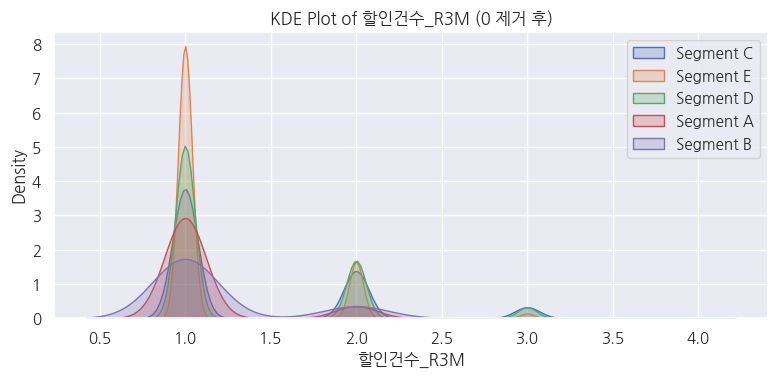

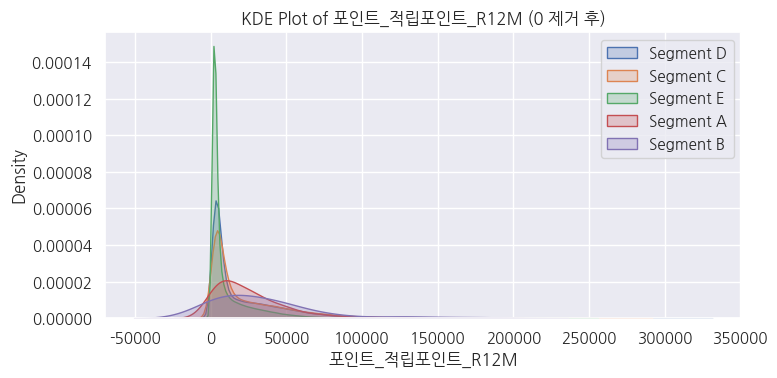

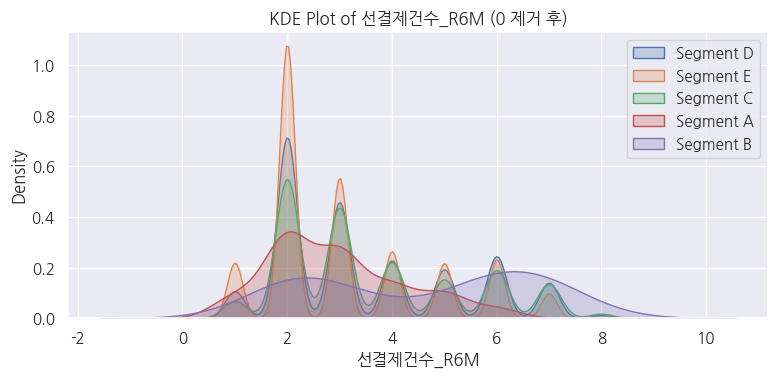

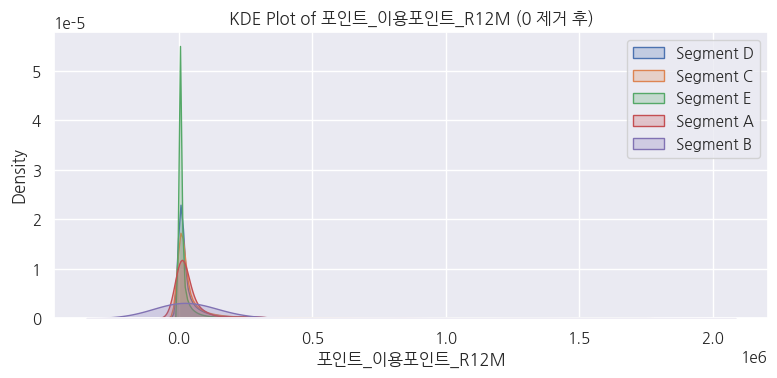

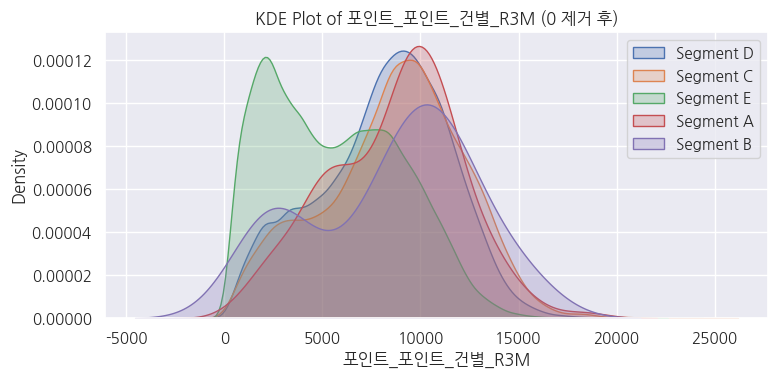

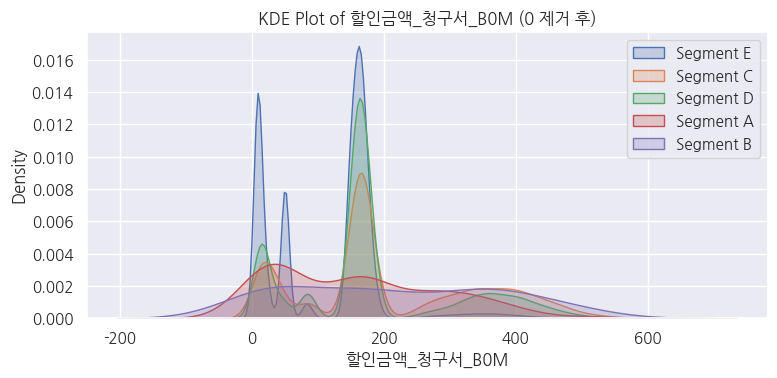

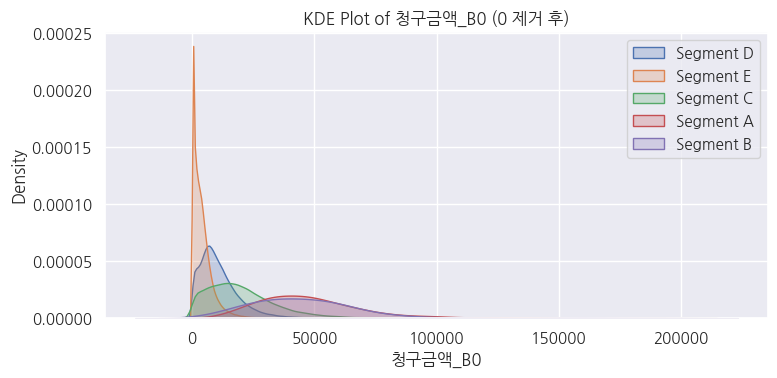

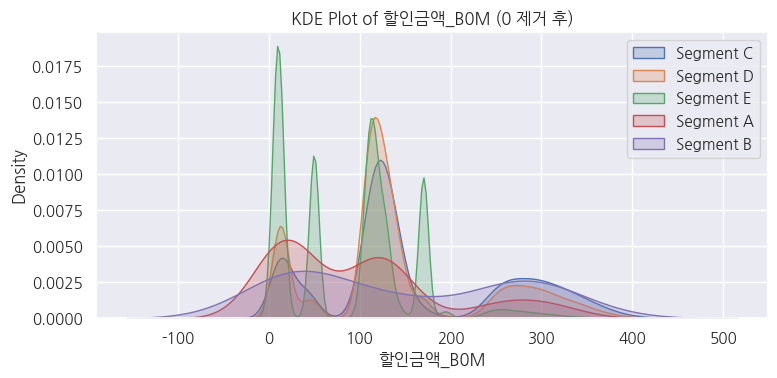

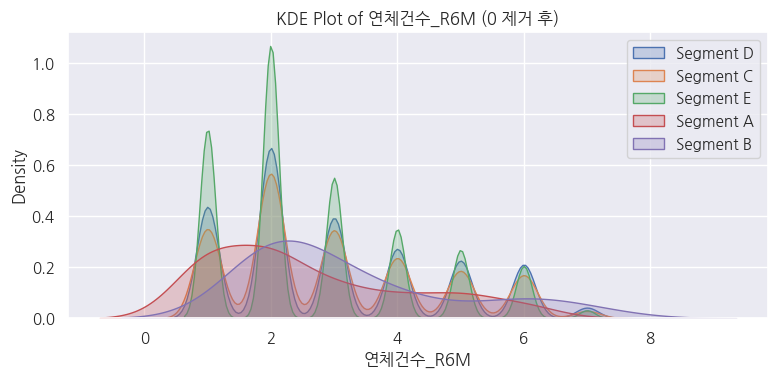

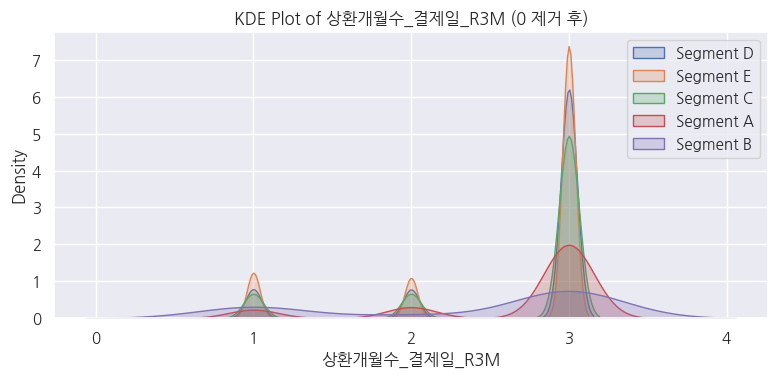

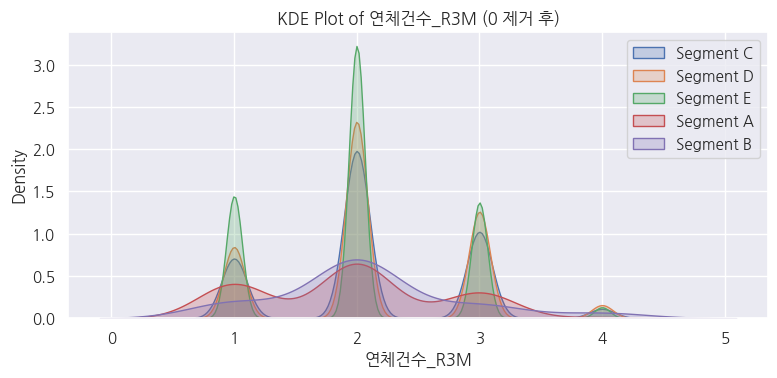

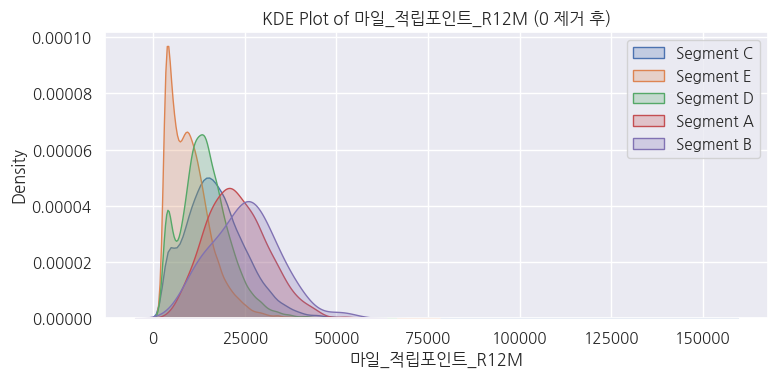

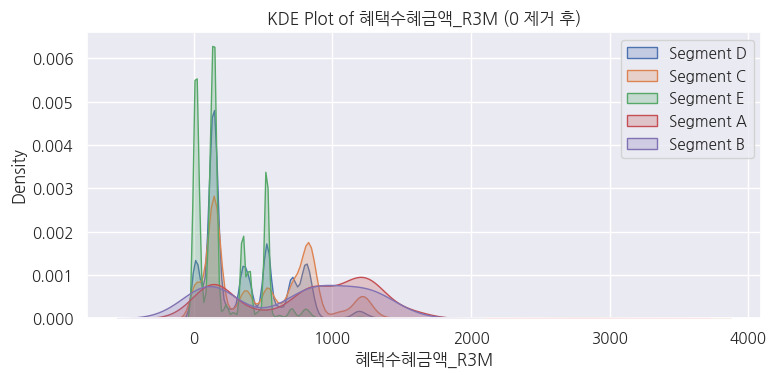

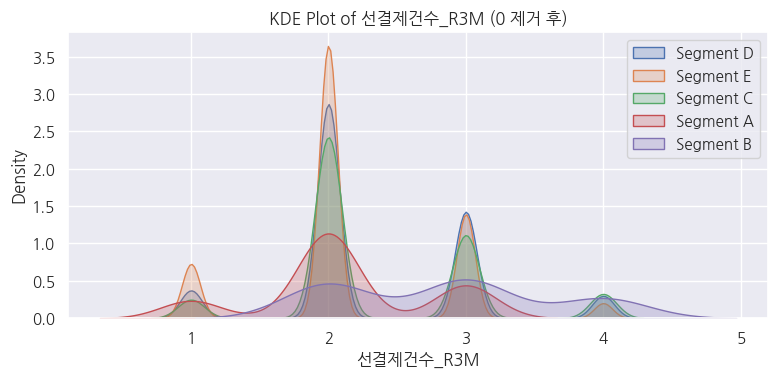

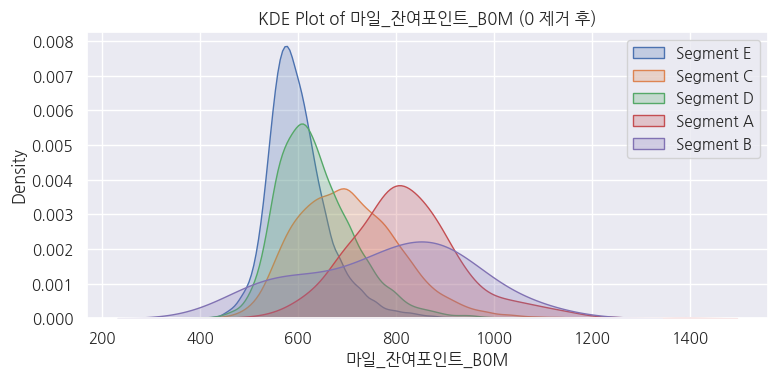

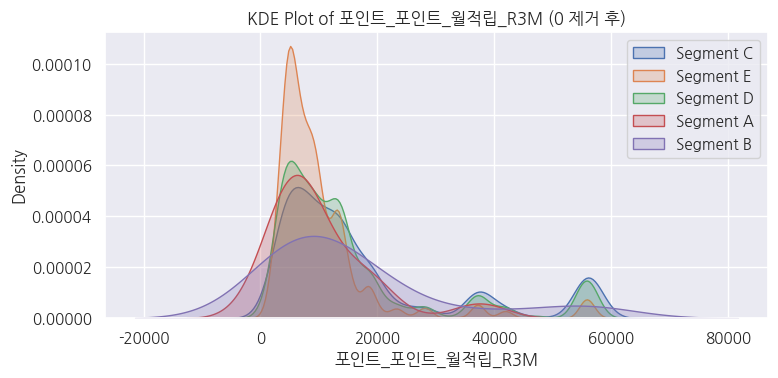

In [60]:
for col in sample_cols:
    filtered_df = total_df[total_df[col] != 0]
    if filtered_df[col].nunique() > 1:
        plt.figure(figsize=(8, 4))
        for seg in filtered_df['Segment'].unique():
            sns.kdeplot(
                data=filtered_df[filtered_df['Segment'] == seg],
                x=col,
                label=f'Segment {seg}',
                fill=True
            )
        plt.title(f'KDE Plot of {col} (0 제거 후)')
        plt.legend()
        plt.tight_layout()
        plt.show()


### 세그먼트별 평균값의 차이를 기반으로 세그먼트를 잘 구분해주는 상위 10개 컬럼

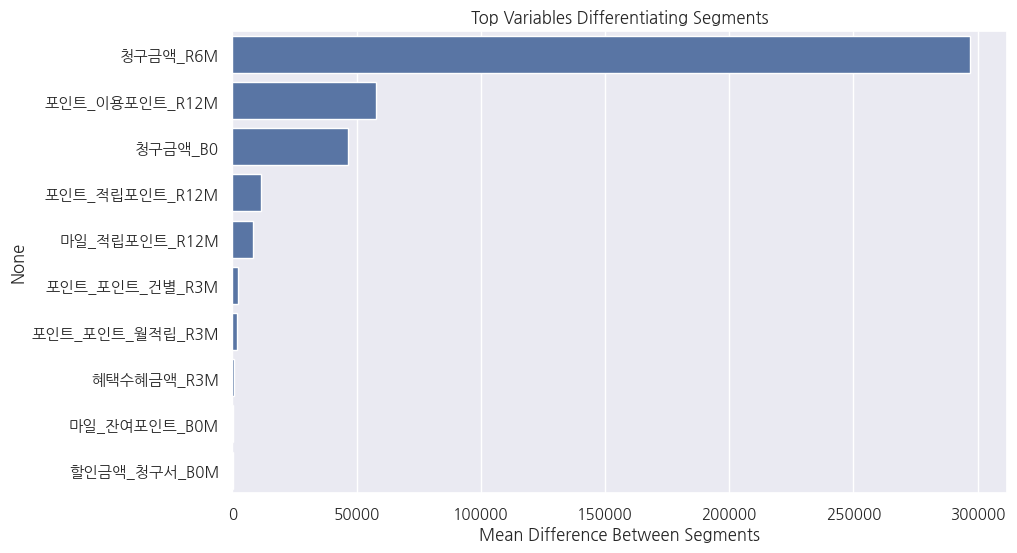

In [68]:
segment_mean = total_df.groupby('Segment').mean(numeric_only=True)
segment_diff = segment_mean.max() - segment_mean.min()
top_vars = segment_diff.sort_values(ascending=False).head(10)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top_vars.values, y=top_vars.index)
plt.title("Top Variables Differentiating Segments")
plt.xlabel("Mean Difference Between Segments")
plt.show()

### 위에서 구한 세그먼트를 잘 구분해주는 상위 10개 컬럼을 기반으로 박스플롯 시각화

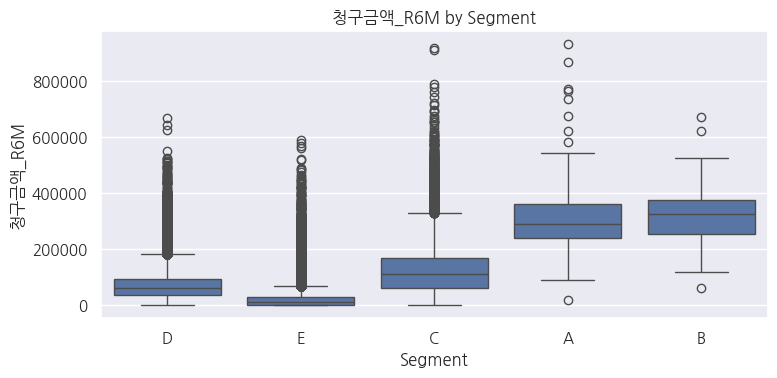

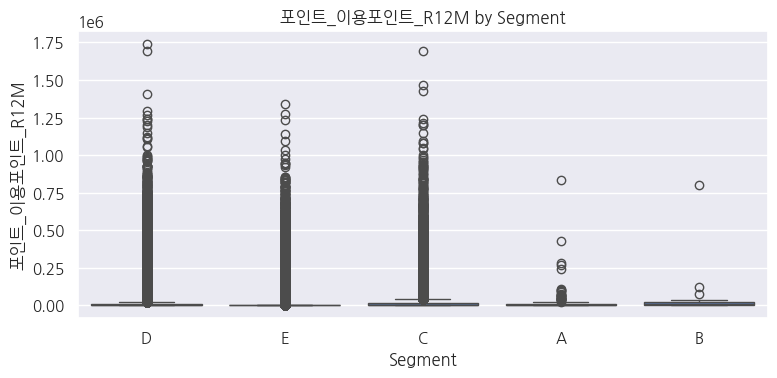

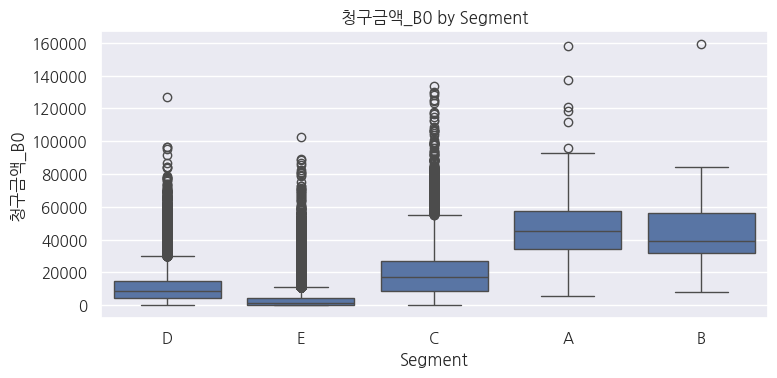

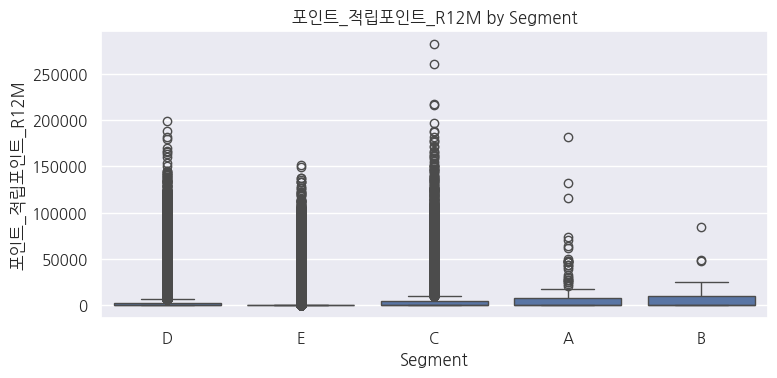

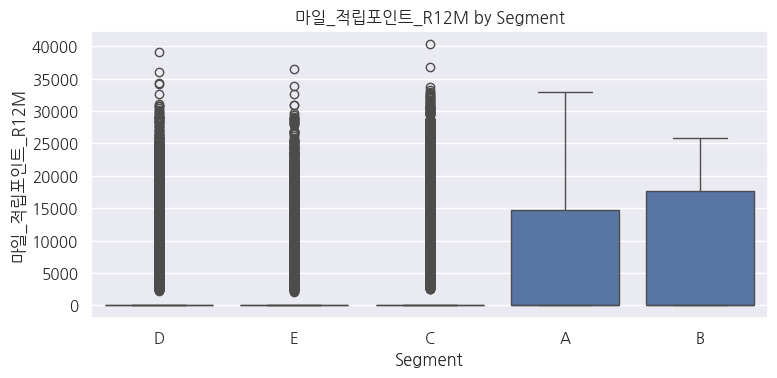

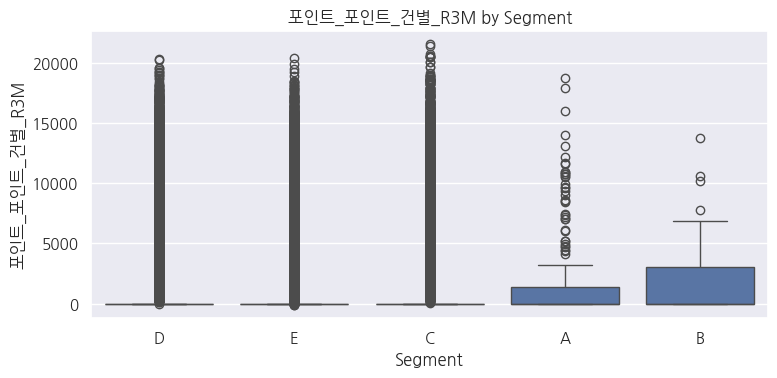

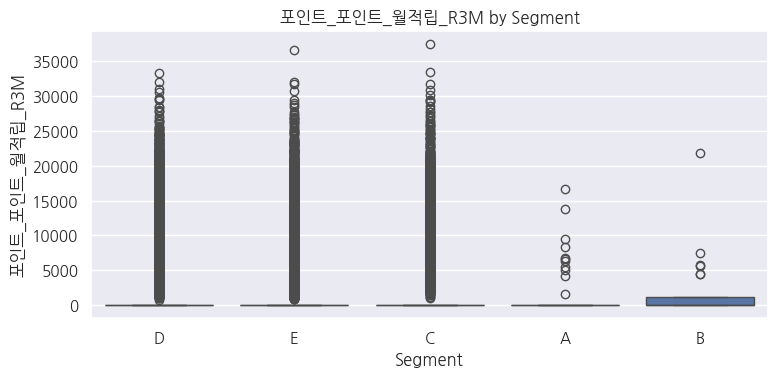

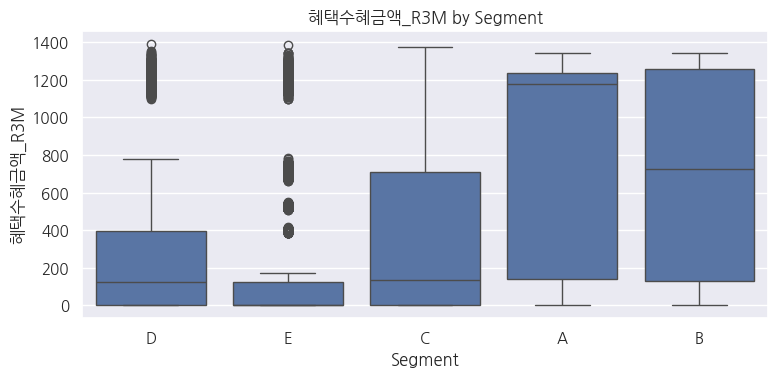

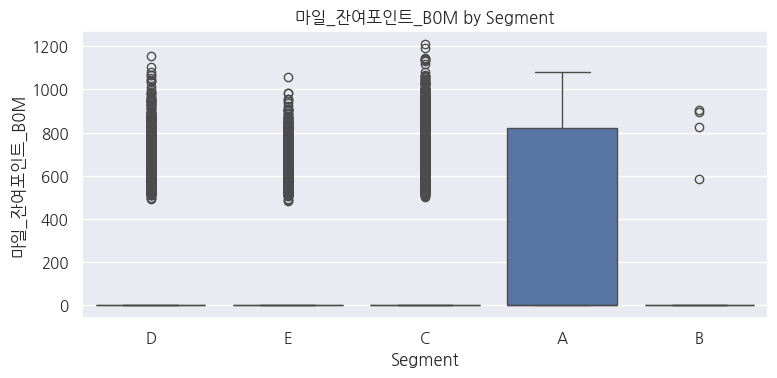

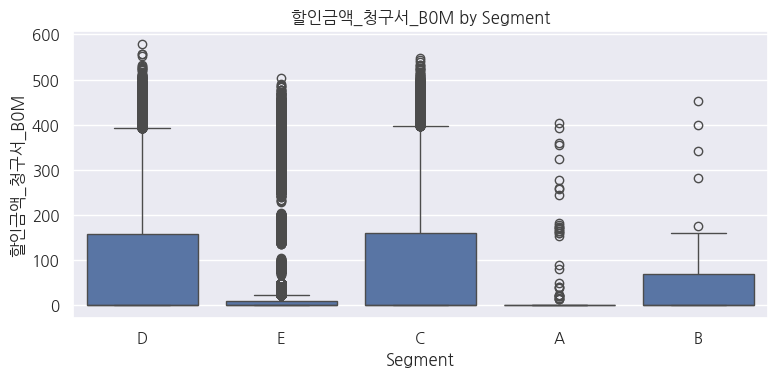

In [62]:
top_features = top_vars.index.tolist()

for col in top_features[:10]:  # 상위 10개만 예시
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=all_df, x='Segment', y=col)
    plt.title(f'{col} by Segment')
    plt.tight_layout()
    plt.show()

### 위에서 구한 세그먼트를 잘 구분해주는 상위 10개 컬럼을 기반으로 Kde플롯 시각화

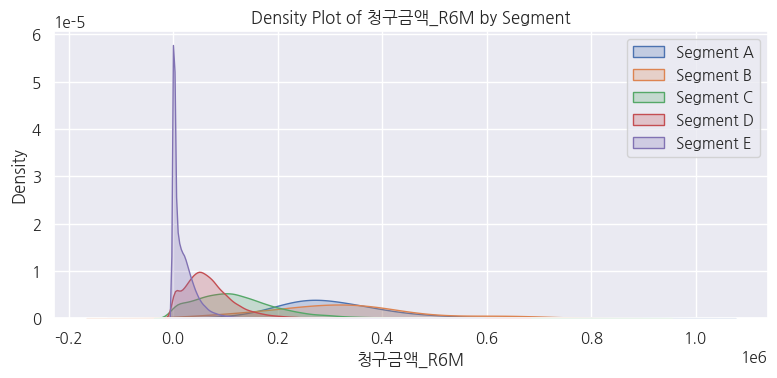

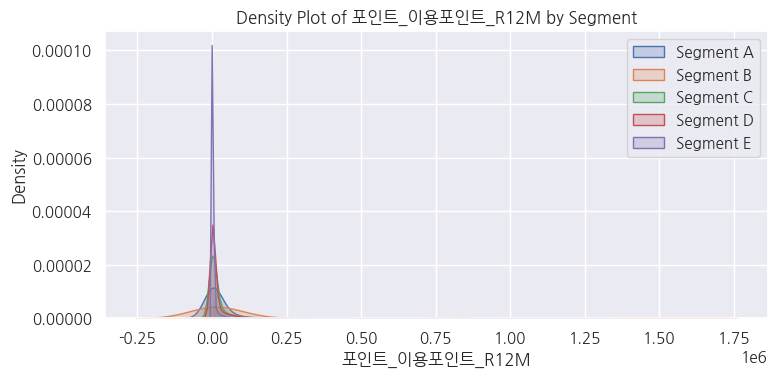

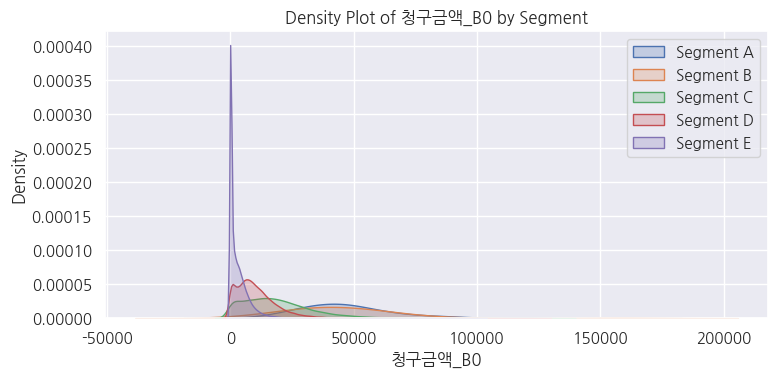

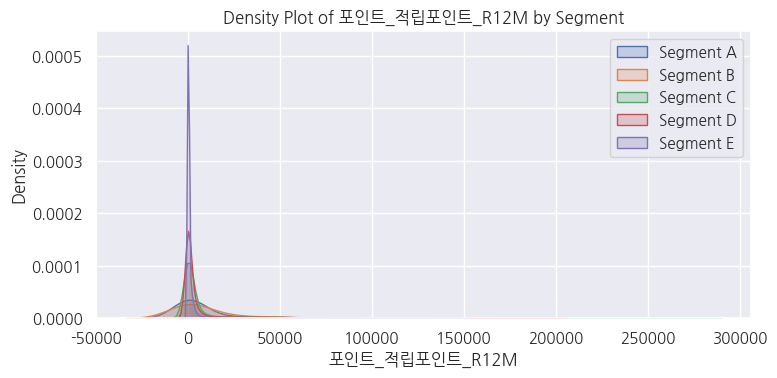

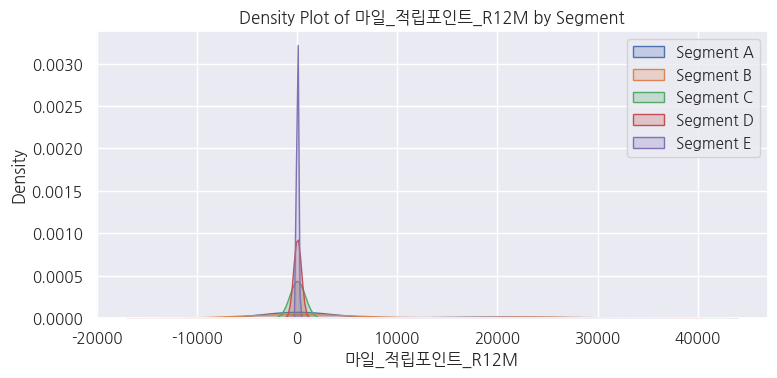

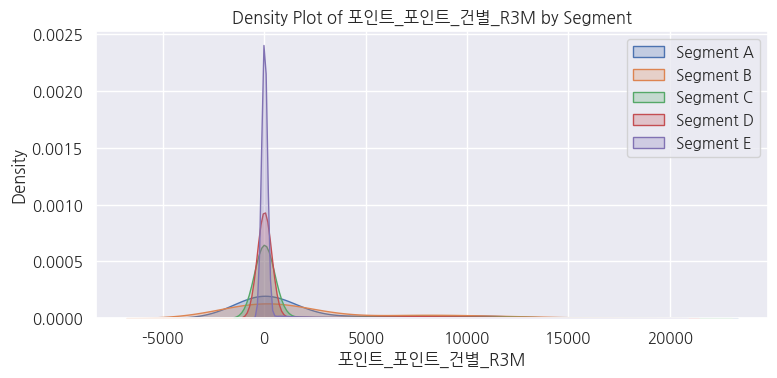

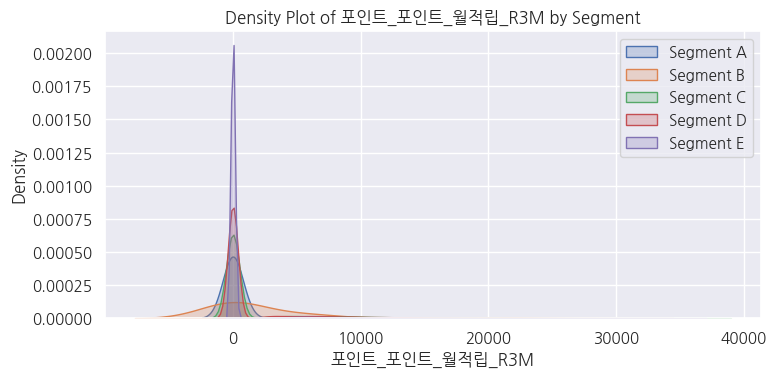

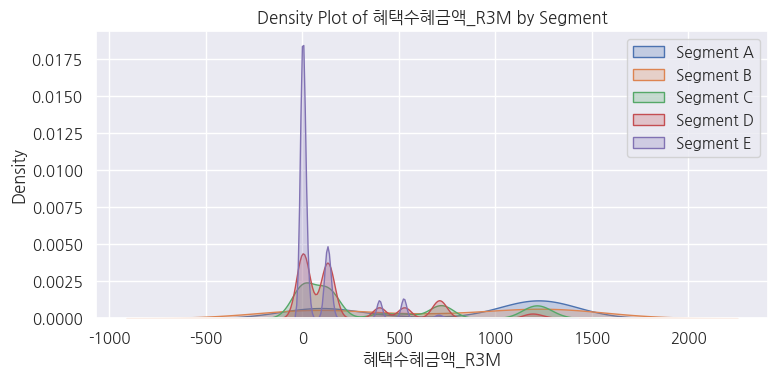

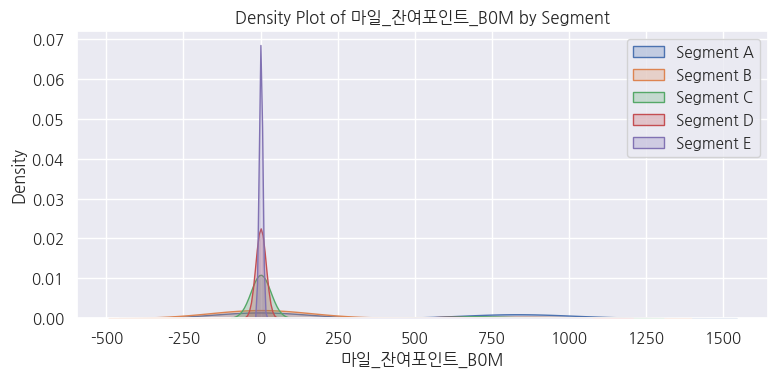

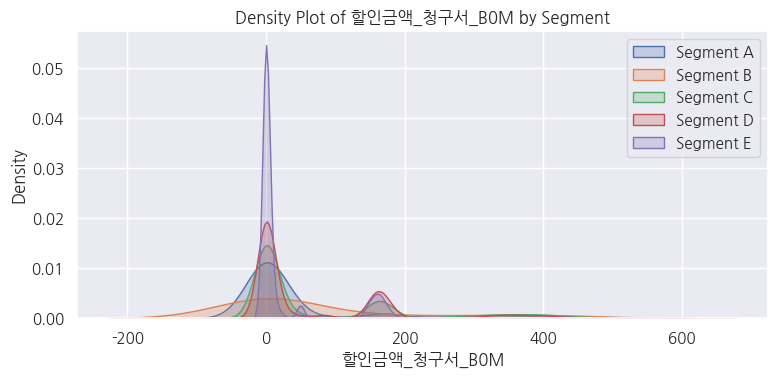

In [63]:
top_features = top_vars.index.tolist()

for col in top_features[:10]:  # 상위 10개만 예시
    plt.figure(figsize=(8, 4))

    for segment in sorted(all_df['Segment'].dropna().unique()):
        subset = all_df[all_df['Segment'] == segment]
        sns.kdeplot(subset[col].dropna(), label=f'Segment {segment}', fill=True, common_norm=False)

    plt.title(f'Density Plot of {col} by Segment')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

### 10개 컬럼 중 상위 2개 컬럼으로 시각화

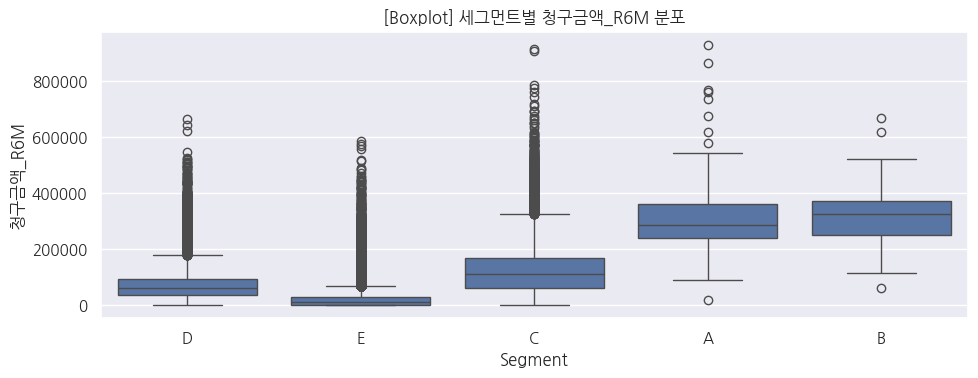

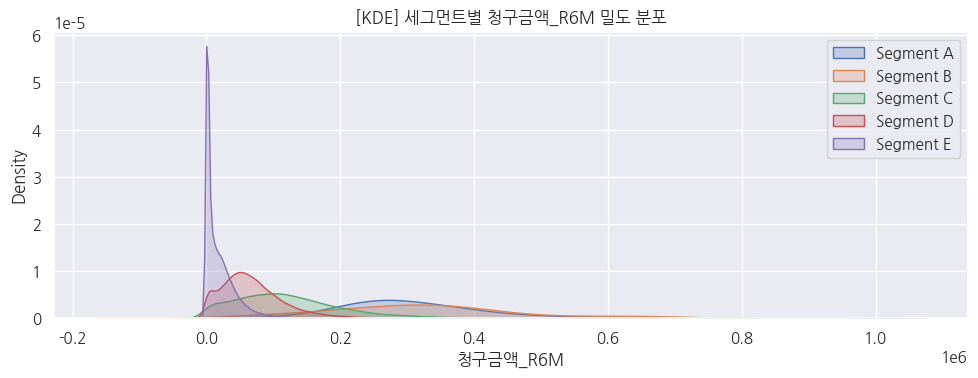

In [65]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=all_df, x='Segment', y='청구금액_R6M')
plt.title('[Boxplot] 세그먼트별 청구금액_R6M 분포')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
for seg in sorted(all_df['Segment'].dropna().unique()):
    sns.kdeplot(
        data=all_df[all_df['Segment'] == seg]['청구금액_R6M'].dropna(),
        label=f'Segment {seg}', fill=True, common_norm=False
    )
plt.title('[KDE] 세그먼트별 청구금액_R6M 밀도 분포')
plt.xlabel('청구금액_R6M')
plt.legend()
plt.tight_layout()
plt.show()


청구금액_R6M은 세그먼트 간 차이가 가장 뚜렷하게 나타나는 변수 중 하나로,
Segment A, B는 상대적으로 청구금액이 높아 활발한 소비 활동을 보이는 우량 고객층으로 해석될 수 있으며,Segment D, E는 청구금액이 낮아 소극적인 이용 고객일 가능성이 높습니다.

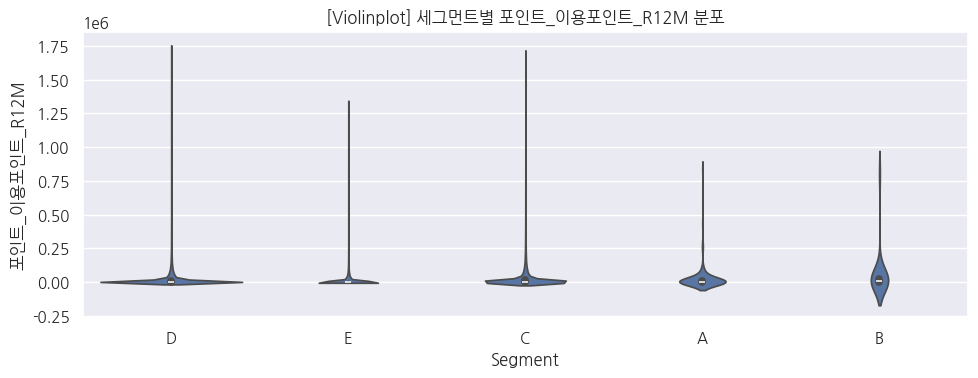

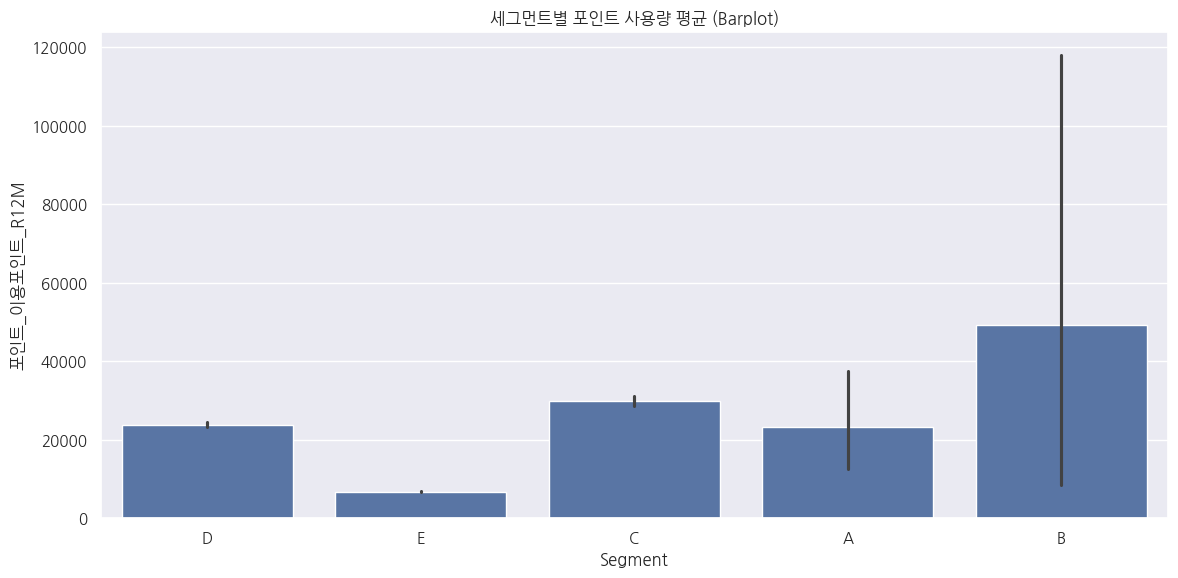

In [67]:
plt.figure(figsize=(10, 4))
sns.violinplot(data=all_df, x='Segment', y='포인트_이용포인트_R12M', inner='box')
plt.title('[Violinplot] 세그먼트별 포인트_이용포인트_R12M 분포')
plt.tight_layout()
plt.show()

sns.barplot(data=all_df, x='Segment', y='포인트_이용포인트_R12M', estimator='mean')
plt.title('세그먼트별 포인트 사용량 평균 (Barplot)')
plt.tight_layout()
plt.show()




Segment C는 평균 포인트 사용량이 높고 분포도 안정적이어서 실질적인 리워드 사용자층으로 보입니다.
반면, Segment B는 평균 사용량은 높지만 분산이 커 일부 고객에 의해 왜곡된 결과일 수 있으며, 마케팅 관점에선 VIP 고객의 힌트가 될 수 있습니다.
Segment A는 평균도 낮고 분포도 아래쪽에 몰려 있어 포인트 사용이 활발하다고 보기 어렵습니다.
Segment D, E는 전반적으로 포인트 사용이 거의 없는 고객군으로 분류됩니다.